## Поиск частых наборов

1. Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций). Список результирующих наборов должен содержать как наборы, так и значение поддержки для каждого набора. Параметрами программы являются набор, порог поддержки и способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).

2. Проведите эксперименты на наборе данных baskets.csv (сведения о покупках в супермаркете). В экспериментах варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%).
 
3. Выполните визуализацию результатов экспериментов в виде следующих диаграмм:
    * сравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки;
    * количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.

In [30]:
import pandas as pd
import chardet
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import time

In [31]:
with open('baskets.csv', 'rb') as f:
    result = chardet.detect(f.read())

result

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}

In [32]:
df = pd.read_csv('baskets.csv', header=None, encoding=result['encoding'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df = df.dropna(how="all", axis=0) # Столбцы
df = df.dropna(how="all", axis=1) # Строки
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print(len(transactions))
print(transactions[:3])

7501
[['креветки', 'миндаль', 'авокадо', 'овощная смесь', 'зеленый виноград', 'цельнозерновая мука', 'батат', 'творог', 'энергетический напиток', 'томатный сок', 'низкокалорийный йогурт', 'зеленый чай', 'мед', 'салат', 'минеральная вода', 'лосось', 'ягодный сок', 'замороженный смузи', 'шпинат', 'оливковое масло'], ['гамбургер', 'фрикадельки', 'яйца'], ['чатни']]


In [34]:
# Преобразование списка транзакций в one-hot encoding (Бинарная матрица)
te = TransactionEncoder()
te_trans = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_trans, columns=te.columns_)
df_encoded.head()

,авокадо,аксессуары,баклажаны,батат,батончик без глютена,бекон,белое вино,белый сыр,блинчики,ветчина,...,чили,шампанское,шампунь,шоколад,шпинат,энергетический батончик,энергетический напиток,эскалоп,ягодный сок,яйца
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [35]:
support_values = [0.01, 0.03, 0.05, 0.10, 0.15]
execution_times = []
results_df = pd.DataFrame()

for support in support_values:

    start_time = time.time()
    
    frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)

    frequent_itemsets = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 1)]

    frequent_itemsets["support_values"] = support

    results_df = results_df._append(frequent_itemsets, ignore_index=True)

    end_time = time.time()

    execution_times.append(end_time - start_time)

results_df = results_df.sort_values(by=["support_values", "support"], ascending=[True, False])
results_df

,support,itemsets,support_values
31,0.238368,(минеральная вода),0.01
26,0.187975,(макароны),0.01
73,0.179709,(яйца),0.01
20,0.170911,(картофель-фри),0.01
69,0.163845,(шоколад),0.01
...,...,...,...
144,0.238368,(минеральная вода),0.15
143,0.187975,(макароны),0.15
146,0.179709,(яйца),0.15
142,0.170911,(картофель-фри),0.15


Наиболее популярные позиции по продаже это: "Минеральная вода", "Макароны" и "Яйца"

In [36]:
frequent_itemsets_2 = apriori(df_encoded, min_support=0.01, use_colnames=True, max_len=2)
frequent_itemsets_2 = frequent_itemsets_2.sort_values(by="support", ascending=False)
frequent_itemsets_2 = frequent_itemsets_2[frequent_itemsets_2["itemsets"].apply(lambda x: len(x) == 2)]
frequent_itemsets_2

,support,itemsets
183,0.061192,"(макароны, минеральная вода)"
211,0.052660,"(шоколад, минеральная вода)"
213,0.050927,"(яйца, минеральная вода)"
199,0.047994,"(молоко, минеральная вода)"
105,0.040928,"(говяжий фарш, минеральная вода)"
...,...,...
124,0.010265,"(торт, замороженные овощи)"
210,0.010265,"(хлопья, минеральная вода)"
96,0.010265,"(гамбургер, рис)"
235,0.010132,"(суп, шоколад)"


Здесь наиболее популярными являются наборы одних из самых встречающихся продуктов, а то есть, например: "Макароны, минеральная вода", "Шоколад, минеральная вода" и "Яйца, минеральная вода". Поддержка данных наборов значительно уменьшилась по сравнению с наборами с одним продуктом, так как алгоритму необходимо просчитать значительно больше зависимостей между всеми продуктами, чем в первом случае с одним товаром. Однако во всех наиболее популярных наборах с двумя товарами есть "Минеральная вода" являющейся самым популярным товаром.

In [37]:
frequent_itemsets_3 = apriori(df_encoded, min_support=0.01, use_colnames=True, max_len=3)
frequent_itemsets_3 = frequent_itemsets_3.sort_values(by="support", ascending=False)
frequent_itemsets_3 = frequent_itemsets_3[frequent_itemsets_3["itemsets"].apply(lambda x: len(x) == 3)]
frequent_itemsets_3

,support,itemsets
245,0.017198,"(макароны, говяжий фарш, минеральная вода)"
254,0.016398,"(шоколад, макароны, минеральная вода)"
252,0.016131,"(макароны, молоко, минеральная вода)"
255,0.015198,"(макароны, яйца, минеральная вода)"
258,0.013998,"(шоколад, молоко, минеральная вода)"
260,0.013465,"(шоколад, яйца, минеральная вода)"
259,0.013065,"(молоко, яйца, минеральная вода)"
249,0.012265,"(макароны, замороженные овощи, минеральная вода)"
244,0.011732,"(макароны, блинчики, минеральная вода)"
256,0.011199,"(шоколад, молоко, макароны)"


Порог поддержки данных наборов ещё меньше, чем в предыдущих случаях, так как алгоритму необходимо обработать ещё больше зависимостей между наборами.

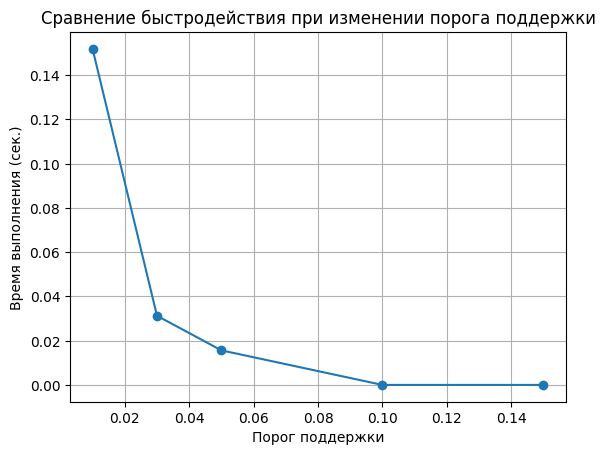

In [41]:
# Cравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки
plt.plot(support_values, execution_times, marker="o")
plt.title("Сравнение быстродействия при изменении порога поддержки")
plt.xlabel("Порог поддержки")
plt.ylabel("Время выполнения (сек.)")
plt.grid(True)
plt.show()

По графику видно, что при повышении порога поддержки время выполнения уменьшается, так как при высоких порогах поддержки алгоритм находит меньше частых наборов, а значит выполняется быстрее.

При повышении порога поддержки количество наборов уменьшается, что уменьшает время обработки алгоритмом, так как меньше наборов проходит "проверку" порогом, а ненужные наборы отсекаются.

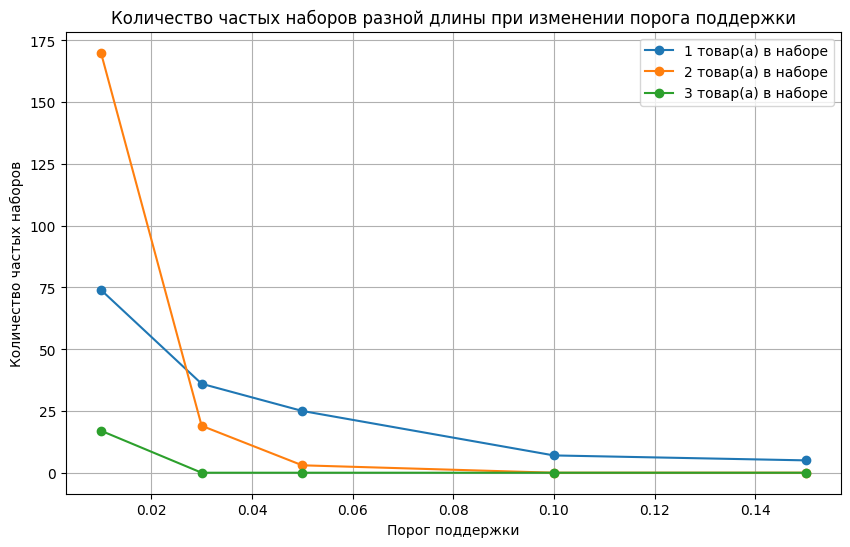

In [42]:
# Количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки
support_values = [0.01, 0.03, 0.05, 0.10, 0.15]
execution_times = []
itemsets_sizes = {1: [], 2: [], 3: []}
results_df = pd.DataFrame()

for support in support_values:
    start_time = time.time()

    frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)

    # Фильтрация частых наборов по длине набора (добавляем .copy())
    frequent_itemsets_1 = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 1)].copy()
    frequent_itemsets_2 = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 2)].copy()
    frequent_itemsets_3 = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 3)].copy()

    # Запись количества наборов для каждого размера
    itemsets_sizes[1].append(len(frequent_itemsets_1))
    itemsets_sizes[2].append(len(frequent_itemsets_2))
    itemsets_sizes[3].append(len(frequent_itemsets_3))

    # Добавляем информацию о пороге поддержки
    frequent_itemsets_1["support_values"] = support
    frequent_itemsets_2["support_values"] = support
    frequent_itemsets_3["support_values"] = support

    # Объединение частых наборов в один DataFrame
    results_df = results_df._append(frequent_itemsets_1, ignore_index=True)
    results_df = results_df._append(frequent_itemsets_2, ignore_index=True)
    results_df = results_df._append(frequent_itemsets_3, ignore_index=True)

    end_time = time.time()
    execution_times.append(end_time - start_time)

results_df = results_df.sort_values(by=["support_values", "support"], ascending=[True, False])

# Визуализация количества частых наборов разной длины
plt.figure(figsize=(10, 6))

for length in [1, 2, 3]:
    plt.plot(support_values, itemsets_sizes[length], marker="o", label=f"{length} товар(а) в наборе")

plt.title("Количество частых наборов разной длины при изменении порога поддержки")
plt.xlabel("Порог поддержки")
plt.ylabel("Количество частых наборов")
plt.legend()
plt.grid(True)
plt.show()

Количество частых наборов резко уменьшается при увеличении порога поддержки на всех выборках, так как порог поддержки отсекает маловстречающиеся наборы. Однако, затем они стабилизируются примерно на уровне порога в 10% частоты, так как остаются наиболее встречающиеся наборы.